
<img src="http://www.nserc-crsng.gc.ca/_gui/wmms.gif" alt="Canada logo" align="right">

<br>

<img src="http://www.triumf.ca/sites/default/files/styles/gallery_large/public/images/nserc_crsng.gif?itok=H7AhTN_F" alt="NSERC logo" align="right" width = 90>



# Exploring NSERC Awards Data


Canada's [Open Government Portal](http://open.canada.ca/en) includes [NSERC Awards Data](http://open.canada.ca/data/en/dataset/c1b0f627-8c29-427c-ab73-33968ad9176e) from 1991 through 2014. The [2015](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/FundingDecisions-DecisionsFinancement/ResearchGrants-SubventionsDeRecherche/ResultsGSC-ResultatsCSS_eng.asp?Year=2015) and [2016](http://www.nserc-crsng.gc.ca/NSERC-CRSNG/FundingDecisions-DecisionsFinancement/ResearchGrants-SubventionsDeRecherche/ResultsGSC-ResultatsCSS_eng.asp?Year=2016) data are available separately. 

The awards data (in .csv format) were copied to an [Amazon Web Services S3 bucket](http://docs.aws.amazon.com/AmazonS3/latest/dev/UsingBucket.html). This open Jupyter notebook starts an exploration of the NSERC investment portfolio during the 1995 -- 2014 epoch. The notebook assumes that you have your AWS keys setup in `~/.aws/credentials`. See the [boto3 docs](http://boto3.readthedocs.io/en/latest/guide/configuration.html) for more information on configuration of credentials. (If you'd like access to the data hosted on S3, please contact [James Colliander](http://colliand.com).)

> **Acknowledgement:** I thank [Ian Allison](https://github.com/ianabc) of the [Pacific Institute for the Mathematical Sciences](http://www.pims.math.ca/) for building the [JupyterHub service](https://pims.jupyter.ca) and for help with this notebook. -- J. Colliander

In [1]:
## Import some Python resources for data and interactive plots.
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import widgets
import numpy as np
import seaborn as sns

import sys

from IPython.display import display, clear_output
from ipywidgets import widgets

sns.set_style("darkgrid")

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## Import the tools for accessing data hosted on AWS S3.
import boto3
import botocore

## name the bucket containing the data
nsercBucket='pims-open-data'

s3 = boto3.client('s3')
exists = True

try:
    s3.head_bucket(Bucket=nsercBucket)
except botocore.exceptions.ClientError as e:
    # If a client error is thrown, then check that it was a 404 error.
    # If it was a 404 error, then the bucket does not exist.
    error_code = int(e.response['Error']['Code'])
    if error_code == 404:
        exists = False

In [3]:
## Bring in a selection of the NSERC awards data starting with 1995 and ending with 2014.
## Throw away as much as you can to keep the DataFrame small enough to manipulate using a laptop.

startYear=1995
endYear=2015  ## This means we include the 2014 collection but not 2015.

nserc = []
institutionAwards = []

s3 = boto3.resource('s3')
bucket = s3.Bucket(nsercBucket)

for year in range(startYear, endYear):
    obj = boto3.client('s3').get_object(
        Bucket=nsercBucket, Key='NSERC_GRT_FYR'+str(year)+'_AWARD.csv')
    df = pd.read_csv(obj['Body'], 
                     encoding='latin1', 
                     usecols = [1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 28],
                    )
    nserc.append(df)
    df.columns = ['Name', 'Department', 'OrganizationID',
                 'Institution', 'ProvinceEN', 'CountryEN',
                 'FiscalYear', 'AwardAmount', 'ProgramID',
                 'ProgramNameEN','ResearchSubjectEN']   ## Rename various columns for easier access.
    print(year)

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014


In [4]:
## Again, throw away some superfluous data to minimize impact on memory.
try:
    nsercDF = pd.concat(nserc)
    del(nserc)
except NameError:
    print("Namespace already cleaned")

print("DataFrame: {:4.2f} Mb".format(sys.getsizeof(nsercDF) / (1024. * 1024)))  ##Quantify data stored in memory.

DataFrame: 249.77 Mb


In [5]:
## These are the columns in our data table.
nsercDF.columns

Index(['Name', 'Department', 'OrganizationID', 'Institution', 'ProvinceEN',
       'CountryEN', 'FiscalYear', 'AwardAmount', 'ProgramID', 'ProgramNameEN',
       'ResearchSubjectEN'],
      dtype='object')

In [6]:
## This is what the data looks like.
nsercDF

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
0,"Aarssen, Lonnie",Biology,29,Queen's University,Ontario,CANADA,1995,41400,RGPIN,Discovery Grants Program - Individual,Terrestrial ecology
1,"Abbott, Harvey",Mathematical Sciences,9,University of Alberta,Alberta,CANADA,1995,14000,RGPIN,Discovery Grants Program - Individual,Combinatorics
2,"Abbott, Sean",Biological Sciences,9,University of Alberta,Alberta,CANADA,1995,5755,PGS,Postgraduate Scholarships,"Taxonomy, systematics and phylogenetics"
3,"Abcarius, John",Electrical Engineering,61,McGill University,Québec,CANADA,1995,10380,PGS,Postgraduate Scholarships,Integrated circuits
4,"Abcarius, Nicole",Head Office,7341,GE Glegg Water Technologies Inc.,Ontario,CANADA,1995,3600,URI,Industrial Undergraduate Student Research Awards,Operations research and management science
5,"Abdalla, Hany",Civil Engineering,70,Concordia University,Québec,CANADA,1995,20985,PDF,Postdoctoral Fellowships,Structural engineering
6,"AbdelAziz, Alaa",Chemistry,21,University of Winnipeg,Manitoba,CANADA,1995,32264,RGPIN,Discovery Grants Program - Individual,Metal and organometallic chemistry
7,"AbdElHalim, Omar",Civil and Environmental Engineering,23,Carleton University,Ontario,CANADA,1995,20000,RGPIN,Discovery Grants Program - Individual,Structural materials
8,"AbdelRahman, AbdelFattah",Geology,70,Concordia University,Québec,CANADA,1995,15000,RGPIN,Discovery Grants Program - Individual,"Petrology, igneous and metamorphic geology"
9,"Abdelrahman, Tarek",Electrical and Computer Eng.,31,University of Toronto,Ontario,CANADA,1995,9500,RGPIN,Discovery Grants Program - Individual,Software and development


## Total Invested by NSERC Over Time

We accumulate the award amounts into a total sum for each year and plot these values over time. These calculations do not take inflation or other factors into account.

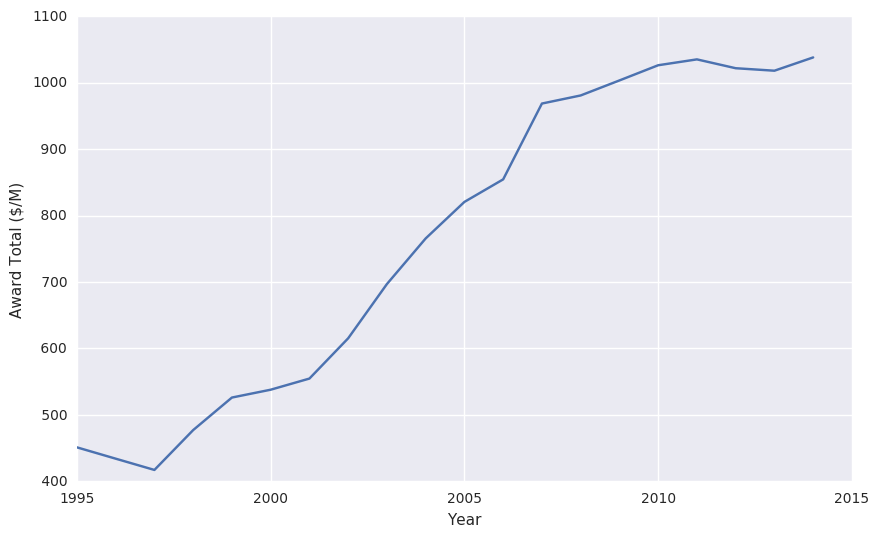

In [7]:
awardTotals = nsercDF.groupby('FiscalYear').sum()['AwardAmount']

import matplotlib.ticker as mtick

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(awardTotals.index, awardTotals/10**6)
ax.set_ylabel('Award Total ($/M)')
ax.set_xlabel('Year')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4d'))

## 2014 Investments by `Institution`

Let's focus in on 2014. We accumulate all the awards for each institution and sort by the resulting totals. Then, we expose an ordered list of the institutions that received the biggest investments from NSERC.

In [8]:
byInstitution = nsercDF[nsercDF.FiscalYear == 2014].groupby('Institution')
top10 = byInstitution.sum()['AwardAmount'].sort_values(
    ascending=False).head(n=10)
top10

Institution
University of Toronto             89894358
University of British Columbia    75418783
University of Alberta             60280376
University of Waterloo            59567435
McGill University                 59203321
Université Laval                  43043887
McMaster University               38444093
Queen's University                34839270
University of Western Ontario     31639903
University of Calgary             31470112
Name: AwardAmount, dtype: int64

We set colors for these institutions to set up visualizations of the data.

In [9]:
institutionList = list(top10.index)
instColor = zip(institutionList, sns.color_palette())
institutionList

['University of Toronto',
 'University of British Columbia',
 'University of Alberta',
 'University of Waterloo',
 'McGill University',
 'Université Laval',
 'McMaster University',
 "Queen's University",
 'University of Western Ontario',
 'University of Calgary']

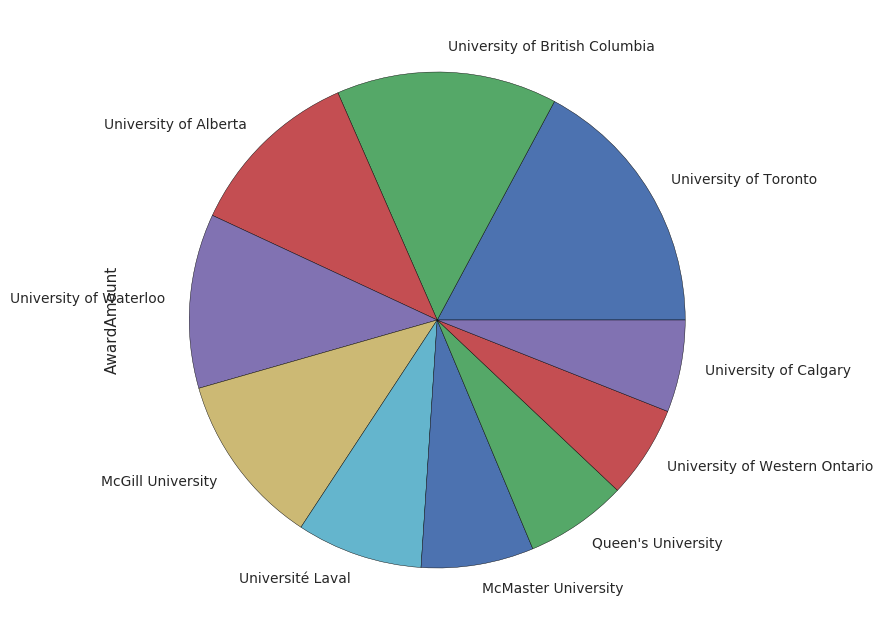

In [10]:
## Make a pie chart.
awards = nsercDF[nsercDF.FiscalYear == 2014].groupby(
    'Institution').sum().sort_values(
    'AwardAmount', ascending=False).head(n=10)
awards.loc[institutionList].plot.pie('AwardAmount',
                                       figsize=(8,8), legend=None)

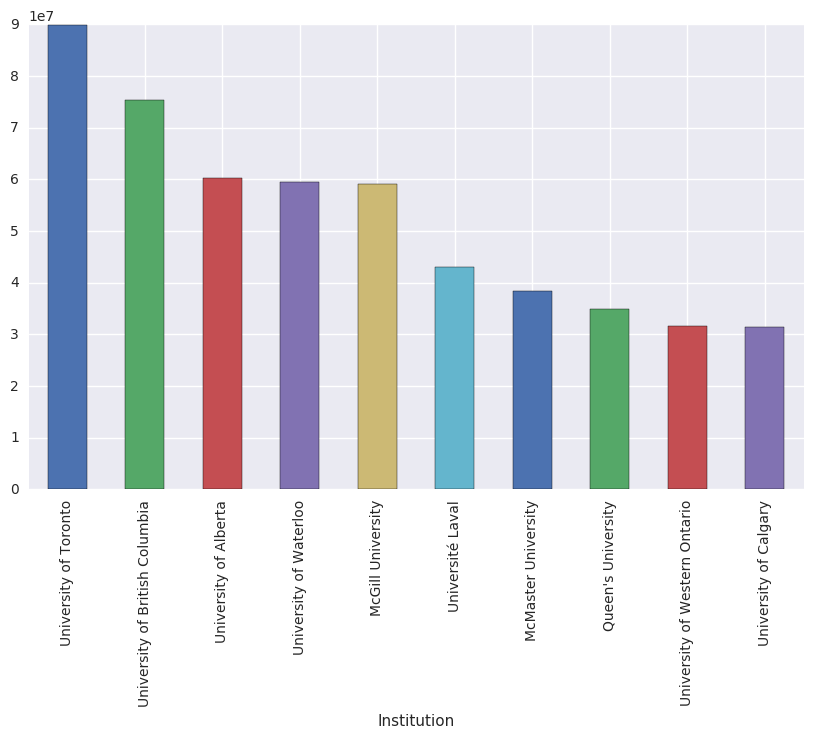

In [11]:
## Make a bar chart.
a = awards.loc[institutionList]['AwardAmount']
a.plot.bar(color=sns.color_palette())

## 2014 Award Totals by `Province`

In [12]:
byProvince = nsercDF[nsercDF.FiscalYear == 2014].groupby('ProvinceEN')
provinceAmounts = byProvince.sum()['AwardAmount'].sort_values(
    ascending=False)
provinceAmounts

ProvinceEN
Ontario                      408720777
Québec                       254239757
British Columbia             138839981
Alberta                      103374397
Nova Scotia                   37018659
Saskatchewan                  31686697
Manitoba                      22792834
New Brunswick                 13409680
Newfoundland and Labrador      8770998
Prince Edward Island           3666008
Massachusetts                  3221392
California                     2843547
New York                       1303457
Yukon                           505315
Michigan                        410415
New Jersey                      300500
Pennsylvania                    260750
Illinois                        258348
Connecticut                     233000
Indiana                         189500
Maryland                        165000
Washington                      154000
Wisconsin                       125500
Texas                           113787
Rhode Island                    106750
Colorado      

## 2014 Award Totals by `ProgramName`

In [13]:
byProgramName = nsercDF[nsercDF.FiscalYear == 2014].groupby('ProgramNameEN')
programNameAmounts = byProgramName.sum()['AwardAmount'].sort_values(
    ascending=False)
programNameAmounts

ProgramNameEN
Discovery Grants Program - Individual                                                                   318531751
Canada Research Chairs                                                                                  112978091
Collaborative Research and Development Grants                                                            75377947
Strategic Projects - Group                                                                               36000622
Networks of Centres of Excellence                                                                        33430050
Engage Grants Program                                                                                    32323878
Alexander Graham Bell Canada Graduate Scholarships - Doctoral                                            28192161
Collaborative Research and Training Experience                                                           27521722
Research Tools and Instruments - Category 1 (<$150,000)                   

## Specific `Department` within an `Institution` over Time

**UBC Mathematics**

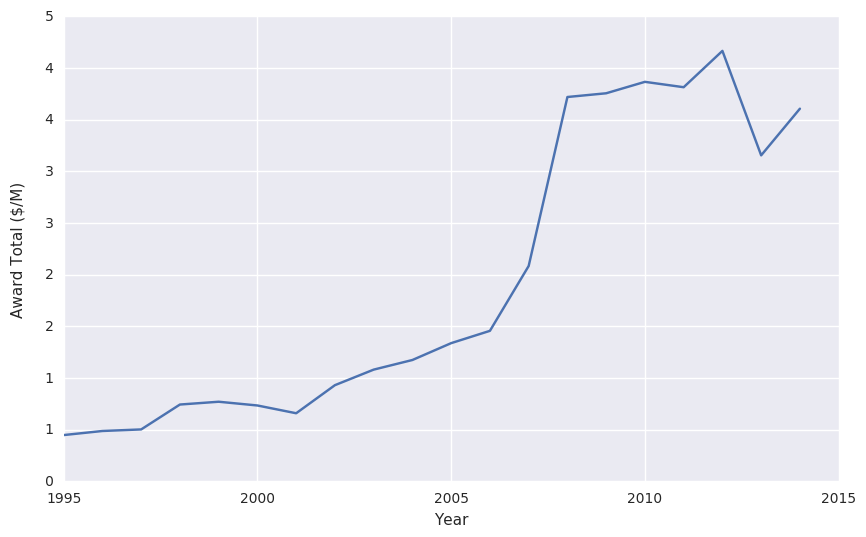

In [14]:
ubcMath = nsercDF.loc[(nsercDF['Department'].isin(['Mathematics'])) 
            & (nsercDF['Institution'].isin(['University of British Columbia']))].groupby('FiscalYear').sum()['AwardAmount']

fig = plt.figure()

ax = fig.add_subplot(111)

ax.plot(ubcMath.index, ubcMath/10**6)
ax.set_ylabel('Award Total ($/M)')
ax.set_xlabel('Year')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%4d'))

## Big Winners over Time

In [15]:
byName = nsercDF.loc[(nsercDF['AwardAmount'] > 1000000)].groupby('Name')
byName.sum().sort_values(
    'AwardAmount', ascending=False).head(n=50)

,OrganizationID,FiscalYear,AwardAmount
Name,,,
"Hormes, Josef",160,20105,99732800
"Gupta, Arvind",83296,40142,89693750
"Frise, Peter",629,34128,63289750
"McWalter, Ian",232,16084,60172580
"Fortier, Louis",816,32112,52423909
"Barge, Brian",48872,16021,49400000
"Thomlinson, William",80,10025,46550000
"Fedosejevs, Robert",459,18063,35872000
"McDonald, Arthur",377,26014,32863300


The first female researcher on the list of "Big NSERC Winners" during the 1996-2014 timeframe appears in position 33.  

## Individual Principal Investigator

In [22]:
nsercDF.loc[nsercDF['Name'].isin(['Vinet, Luc'])]

,Name,Department,OrganizationID,Institution,ProvinceEN,CountryEN,FiscalYear,AwardAmount,ProgramID,ProgramNameEN,ResearchSubjectEN
14711,"Vinet, Luc",Centre de recherches mathématiques,63,Université de Montréal,Québec,CANADA,1995,825000,CSPPR,Collaborative Special Project Grants,Not available
14712,"Vinet, Luc",Centre de recherches mathématiques,63,Université de Montréal,Québec,CANADA,1995,126460,CPGPJ,Collaborative Project Grants (H),Combinatorics
14713,"Vinet, Luc",Physique,63,Université de Montréal,Québec,CANADA,1995,40000,SAPIN,Subatomic Physics Envelope - Individual,Not available
13249,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,119000,CPGPJ,Collaborative Project Grants (H),Combinatorics
13250,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,39000,RGPIN,Discovery Grants Program - Individual,Particle physics
13251,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,800000,CSPPR,Collaborative Special Project Grants,Not available
13252,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1996,600000,NETGP,Research Networks,Not available
12817,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,119000,CPGPJ,Collaborative Project Grants (H),Combinatorics
12818,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,39000,RGPIN,Discovery Grants Program - Individual,Particle physics
12819,"Vinet, Luc","Recherches mathématiques, centre de",63,Université de Montréal,Québec,CANADA,1997,800000,CSPPR,Collaborative Special Project Grants,Not available


In [17]:
nsercDF.loc[nsercDF['Name'].isin(['Hinton, Geoffrey'])]['AwardAmount'].sum()
## Total Amount Invested in CAD (not corrected for inflation)

3879076

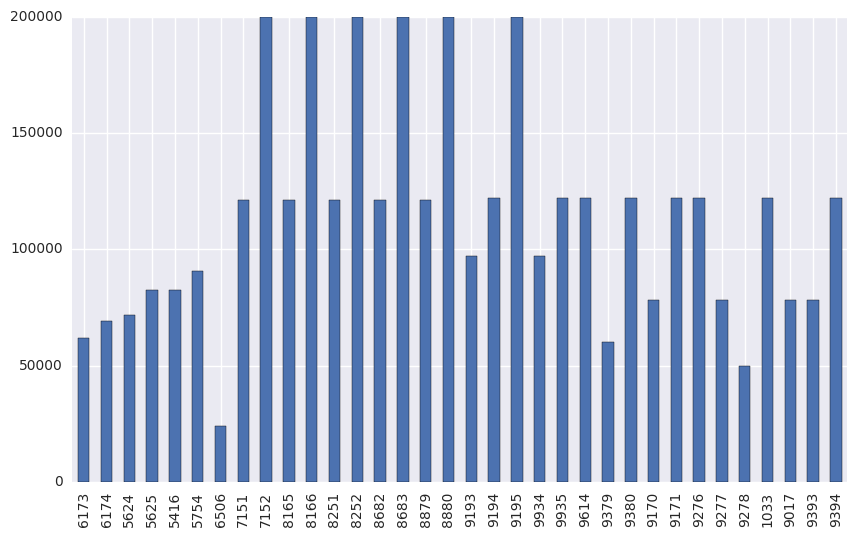

In [18]:
nsercDF.loc[nsercDF['Name'].isin(['Hinton, Geoffrey'])]['AwardAmount'].plot(kind='bar')

## Exploring a Specific Program

In [19]:
nsercDF.loc[nsercDF['ProgramNameEN'].isin(['Canada Excellence Research Chairs'])]['AwardAmount'].sum()

86816666

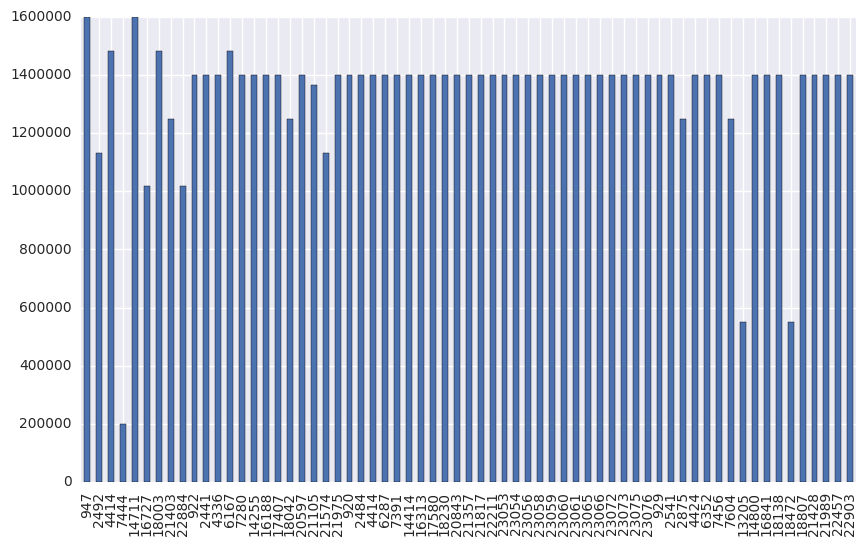

In [20]:
nsercDF.loc[nsercDF['ProgramNameEN'].isin(['Canada Excellence Research Chairs'])]['AwardAmount'].plot(kind='bar')